# Vector Calculus (SKP)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as smp
from sympy import *
from sympy.vector import *
from sys import displayhook
from tkinter.tix import DisplayStyle

## Vector derivatives

In [2]:
x, y, z, t = smp.symbols('x y z t')

In [3]:
# input the vector
r = smp.Matrix([4*t,6*smp.cos(5*t),t**3])
display('r', r)
diffr = smp.diff(r,t)
display('dr/dt', diffr)

'r'

Matrix([
[       4*t],
[6*cos(5*t)],
[      t**3]])

'dr/dt'

Matrix([
[           4],
[-30*sin(5*t)],
[      3*t**2]])

**Example:** Find the angle between the velocity and acceleration as a function of time $\theta(t)$ and also find the angle at $t=4s$. Plot $t$ vs $\theta(t)$ graph.

In [4]:
v = smp.diff(r,t)
a = smp.diff(v,t)
theta = smp.acos(v.dot(a)/(v.norm()*a.norm()))
display('theta',theta.simplify())
display('theta at t=4', theta.subs(t,4).evalf())

'theta'

acos(3*(t**3 + 125*sin(10*t))/(sqrt(Abs(t)**2 + 625*Abs(cos(5*t))**2)*sqrt(9*Abs(t**2)**2 + 900*Abs(sin(5*t))**2 + 16)))

'theta at t=4'

0.681852695830224

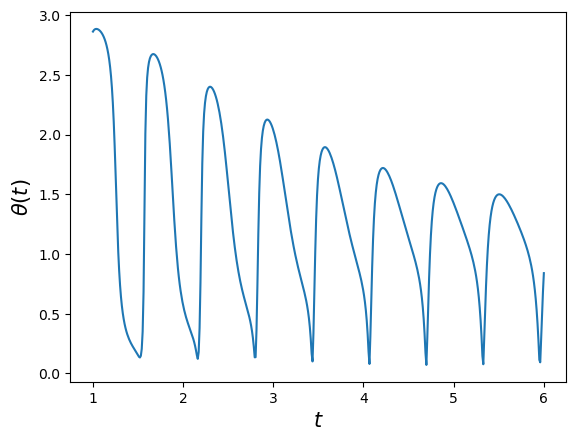

In [5]:
thetaf = smp.lambdify([t], theta)  # function

tt = np.linspace(1,6,500)
tht = thetaf(tt)
plt.plot(tt,tht)
plt.xlabel('$t$', fontsize=15)
plt.ylabel(r'$\theta(t)$', fontsize=15)
plt.show()

## Vector Integrals

In [6]:
# input the matrix
r = smp.Matrix([smp.exp(-t**3), smp.sin(t), 5*t**3 + 4*t])
I = smp.Integral(r,t)
display(I)
display(I.doit())

Integral(Matrix([
[  exp(-t**3)],
[      sin(t)],
[5*t**3 + 4*t]]), t)

Matrix([
[gamma(1/3)*lowergamma(1/3, t**3)/(9*gamma(4/3))],
[                                        -cos(t)],
[                              5*t**4/4 + 2*t**2]])

Some cases integrals can't be solved analytically. We need to solve them *numerically*.

In [7]:
# input the matrix
r1 = smp.Matrix([smp.exp(-t**2)*smp.cos(t)**3, smp.exp(-t**4), 1/(3+t**2)])
I1 = smp.Integral(r1, (t,0,1))
display(I1)

Integral(Matrix([
[exp(-t**2)*cos(t)**3],
[          exp(-t**4)],
[        1/(t**2 + 3)]]), (t, 0, 1))

In [8]:
from scipy.integrate import quad_vec
r1f = smp.lambdify([t],r1)
quad_vec(r1f,0,1)

(array([[0.53525785],
        [0.84483859],
        [0.30229989]]),
 3.5151979041265046e-14)

## Gradients ($ \nabla f $)

Here we need to work with some particular co-ordinate system.

In [9]:
C = CoordSys3D('')

# write the function
f1 = C.x*smp.cos(C.y)
display('function',f1)
gradf1 = gradient(f1)
gradf1m = gradf1.to_matrix(C)
display('gradient', gradf1, gradf1m)

'function'

.x*cos(.y)

'gradient'

(cos(.y))*.i + (-.x*sin(.y))*.j

Matrix([
[    cos(.y)],
[-.x*sin(.y)],
[          0]])

### Directional Derivatives

$$ D_u f = \nabla f \cdot u $$

In [10]:
# write the function
f1 = C.x*smp.cos(C.y)
display('function',f1)

# write the vector
uvec = 6*C.i +3*C.j -5*C.k
u1 = uvec.normalize()  # making unit vector
display('unit vector', u1)

Du1f1 = gradient(f1).dot(u1)
display('directional derivative', Du1f1)

'function'

.x*cos(.y)

'unit vector'

(3*sqrt(70)/35)*.i + (3*sqrt(70)/70)*.j + (-sqrt(70)/14)*.k

'directional derivative'

-3*sqrt(70)*.x*sin(.y)/70 + 3*sqrt(70)*cos(.y)/35

## Line Integrals (Scalar)

Given curve, $ \vec{r}(t) = \left< g(t), h(t), k(t) \right> $. The line integral of $f(x,y,z)$ along the curve is,
$$ \int_C f(x,y,z) ds = \int_a^b f(g(t), h(t), k(t))|d\vec{r}/dt|dt $$

In [11]:
t = smp.symbols('t', real=True)
x,y,z,f,a,b = smp.symbols('x y z f a b', cls=smp.Function, real=True)
x = x(t)
y = y(t)
z = z(t)
f = f(x,y,z)
r = smp.Matrix([x,y,z])

linints = f*r.diff(t).norm()
smp.Integral(linints, (t, a, b))

Integral(sqrt(Abs(Derivative(x(t), t))**2 + Abs(Derivative(y(t), t))**2 + Abs(Derivative(z(t), t))**2)*f(x(t), y(t), z(t)), (t, a, b))

Write the curve $\vec{r}$ and the function $f(x,y,z)$,
1. $ \vec{r}(t) = \left<\cos(t),\sin(t),t\right>; \hspace{3mm} $ (Helix)
2. $ f(x,y,z) = 2xy + \sqrt{z} $

We are going from $t=0$ to $t=2\pi$.

In [12]:
f1s = 2*x*y + smp.sqrt(z)  # input f(x,y,z)
x1s = smp.cos(t)  # input x(t)
y1s = smp.sin(t)  # input y(t)
z1s = t   # input z(t)
a1s, b1s = 0, 2*smp.pi   # input limits of t
linints1 = linints.subs([(f,f1s),(x,x1s),(y,y1s),(z,z1s)]).doit().simplify()
display(smp.Integral(linints1, (t,a1s,b1s)))
smp.integrate(linints1, (t,a1s, b1s)).simplify()

Integral(sqrt(2)*(sqrt(t) + sin(2*t)), (t, 0, 2*pi))

8*pi**(3/2)/3

We also need the numerical solution as most of the cases can't be solved symbolically. For integration we can use `quad` function of `scipy.integrate`.

Write the curve $\vec{r}$ and the function $f(x,y,z)$,
1. $ \vec{r}(t) = \left<3\cos(t), 2\sin(t), e^{t/4} \right> $
2. $ f(x,y,z)=2xy+\sqrt{z} $

We are going from $t=0$ to $t=2\pi$.

In [13]:
f2s = 2*x*y + smp.sqrt(z)  # input f(x,y,z)
x2s = 3*smp.cos(t)   # input x(t)
y2s = 2*smp.sin(t)   # input y(t)
z2s = smp.exp(t/4)   # input z(t)
a2s, b2s = 0, 2*smp.pi   # input limits of t
linints2 = linints.subs([(f,f2s),(x,x2s),(y,y2s),(z,z2s)]).doit().simplify()
display(smp.Integral(linints2, (t,a2s,b2s)))
#smp.integrate(linints2, (t,a2s, b2s)).simplify()

Integral((exp(t/8) + 6*sin(2*t))*sqrt(exp(t/2) + 80*sin(t)**2 + 64)/4, (t, 0, 2*pi))

In [14]:
from scipy.integrate import quad
linints2f = smp.lambdify([t], linints2)
quad(linints2f, a2s, b2s)[0]

24.294733741870633

## Line Integrals (Vector)

Given, $\vec{r}(t) = \left< g(t), h(t), k(t) \right>$. The line integral of $\vec{F}(x,y,z)$ along the curve is;

$$ \int_C \vec{F}(x,y,z) \cdot d\vec{r} = \int_a^b\vec{F}(g(t), h(t), k(t)) \cdot \frac{d\vec{r}}{dt} dt $$

In [15]:
t, a, b = smp.symbols('t a b', real=True)
x,y,z,F1,F2,F3 = smp.symbols('x y z F_1 F_2 F_3',cls=smp.Function,real=True)
x, y, z = x(t), y(t), z(t)
F1, F2, F3 = F1(x,y,z), F2(x,y,z), F3(x,y,z)
r = smp.Matrix([x, y, z])
F = smp.Matrix([F1, F2, F3])

linintv = F.dot(r.diff(t))
display(smp.Integral(linintv, (t,a,b)).simplify())

Integral(F_1(x(t), y(t), z(t))*Derivative(x(t), t) + F_2(x(t), y(t), z(t))*Derivative(y(t), t) + F_3(x(t), y(t), z(t))*Derivative(z(t), t), (t, a, b))

Write the curve $\vec{r}(t)$ and the Function $\vec{F}(x,y,z)$;

1. Curve: $ \vec{r}(t) = \left<t, t^2, t^4 \right> $ 
2. Function: $ \vec{F} = \left< \sqrt{z}, -2x, \sqrt{y}\right> $ 

*Limit:* from $t=0$ to $t=1$.

In [16]:
F11s = smp.sqrt(z)
F21s = -2*x
F31s = smp.sqrt(y)
x1s = t
y1s = t**2
z1s = t**4
a1s, b1s = 0, 1
linintv1 = linintv.subs([(F1,F11s),(F2,F21s),(F3,F31s),
            (x,x1s),(y,y1s),(z,z1s)]).doit().simplify()
display(smp.Integral(linintv1, (t,a1s,b1s)))
smp.integrate(linintv1, (t,a1s,b1s))

Integral(t**2*(4*t*Abs(t) - 3), (t, 0, 1))

-1/5

Many of the integrals can't be solved symbolically and we must do that numerically.

Write the curve $\vec{r}(t)$ and the Function $\vec{F}(x,y,z)$;

1. Curve: $ \vec{r}(t) = \left<3\cos^2(t), t^2, 2\sin(t) \right> $ 
2. Function: $ \vec{F} = \left< \sqrt{|z|}, -2x, \sqrt{|y|}\right> $ 

*Limit:* from $t=0$ to $t=2\pi$.

In [17]:
F12s = smp.sqrt(smp.Abs(z))
F22s = -2*x
F32s = smp.sqrt(smp.Abs(y))
x2s = 3*smp.cos(t)**2
y2s = t**2
z2s = 2*smp.sin(t)
a2s, b2s = 0, 2*smp.pi
linintv2 = linintv.subs([(F1,F12s),(F2,F22s),(F3,F32s),
            (x,x2s),(y,y2s),(z,z2s)]).doit().simplify()
display(smp.Integral(linintv2, (t,a2s,b2s)))
#smp.integrate(linintv2, (t,a2s,b2s)) # takes much time

Integral(2*(-6*t*cos(t) - 3*sqrt(2)*sin(t)*sqrt(Abs(sin(t))) + Abs(t))*cos(t), (t, 0, 2*pi))

In [18]:
from scipy.integrate import quad
linintv2f = smp.lambdify([t], linintv2)
quad(linintv2f, a2s, b2s)[0]

-118.4352528130723

## Surface Integrals (Scalar)

Area of a surface is given by;
$$ A = \iint_S \left| \frac{d\vec{r}}{du} \times \frac{d\vec{r}}{dv} \right| du dv;
\hspace{4mm} where \hspace{2mm} \vec{r}=\vec{r}(u,v) $$

$\vec{r}$ denotes the surface and it's a function of 2 variables.

The surface integral of a scalar function $G(\vec{r})$ is given by;

$$ \iint_S G(\vec{r}(u,v)) \left| \frac{d\vec{r}}{du} \times \frac{d\vec{r}}{dv} \right| du dv $$

In [19]:
#  r = r(u=rho, v=theta)
rho, th = smp.symbols('\\rho \\theta', pos=True, real=True)
x, y, z, G = smp.symbols('x y z G', cls=smp.Function, real=True)
x, y, z = x(rho,th), y(rho,th), z(rho,th)
G = G(x,y,z)
r = smp.Matrix([x,y,z])

surints = G* r.diff(rho).cross(r.diff(th)).norm()
surints

sqrt(Abs(Derivative(x(\rho, \theta), \rho)*Derivative(y(\rho, \theta), \theta) - Derivative(x(\rho, \theta), \theta)*Derivative(y(\rho, \theta), \rho))**2 + Abs(Derivative(x(\rho, \theta), \rho)*Derivative(z(\rho, \theta), \theta) - Derivative(x(\rho, \theta), \theta)*Derivative(z(\rho, \theta), \rho))**2 + Abs(Derivative(y(\rho, \theta), \rho)*Derivative(z(\rho, \theta), \theta) - Derivative(y(\rho, \theta), \theta)*Derivative(z(\rho, \theta), \rho))**2)*G(x(\rho, \theta), y(\rho, \theta), z(\rho, \theta))

Write the curve $\vec{r}(\rho,\theta)$ and the Function $G(x,y,z)$;

1. Surface: $\vec{r}(x,y) = \left<x, y, x^2+y^2 \right>$ and thus $\vec{r}(\rho, \theta) = \left<\rho\cos\theta, \rho\sin\theta, \rho^2\right>$
2. Function: $G(x,y,z)=x^2+y^2$

*Limits:* ($\rho=0$ to $\rho=1$) and ($\theta=0$ to $\theta=2\pi$).

In [20]:
G1s = x**2 +y**2
x1s = rho*smp.cos(th)
y1s = rho*smp.sin(th)
z1s = rho**2
rhomin1, rhomax1 = 0, 1
thmin1, thmax1 = 0, 2*smp.pi

surints1 = surints.subs([(G,G1s),(x,x1s),(y,y1s),(z,z1s)]).doit().simplify()
display(smp.Integral(surints1,(rho,rhomin1,rhomax1),(th,thmin1,thmax1)))
smp.integrate(surints1,(rho,rhomin1,rhomax1),(th,thmin1,thmax1))

Integral(\rho**2*sqrt(4*\rho**2 + 1)*Abs(\rho), (\rho, 0, 1), (\theta, 0, 2*pi))

2*pi*(1/120 + 5*sqrt(5)/24)

Complicated integrals can be solved numerically.

Write the curve $\vec{r}(\rho,\theta)$ and the Function $G(x,y,z)$;

1. Surface: $\vec{r}(x,y) = \left<x, y, x^2+y^2 \right>$ and thus $\vec{r}(\rho, \theta) = \left<\rho\cos\theta, \rho\sin\theta, \rho^2\right>$
2. Function: $G(x,y,z)= (x^2+y^2) e^z$

*Limits:* ($\rho=0$ to $\rho=1$) and ($\theta=0$ to $\theta=2\pi$).

In [21]:
G2s = (x**2+y**2)*smp.exp(z)
x2s = rho*smp.cos(th)
y2s = rho*smp.sin(th)
z2s = rho**2
rhomin2, rhomax2 = 0, 1
thmin2, thmax2 = 0, 2*smp.pi

surints2 = surints.subs([(G,G2s),(x,x2s),(y,y2s),(z,z2s)]).doit().simplify()
display(smp.Integral(surints2,(rho,rhomin2,rhomax2),(th,thmin2,thmax2)))
#smp.integrate(surints2,(rho,rhomin2,rhomax2),(th,thmin2,thmax2)).evalf()

Integral(\rho**2*sqrt(4*\rho**2 + 1)*exp(\rho**2)*Abs(\rho), (\rho, 0, 1), (\theta, 0, 2*pi))

In [22]:
import numpy as np
from scipy.integrate import dblquad
surints2f = smp.lambdify([rho,th],surints2)
dblquad(surints2f,thmin2,thmax2,rhomin2,rhomax2)[0]

6.13723773063216

## Surface Integtals(Vectors)

The surface integral of a vector function $\vec{G}(\vec{r})$ is given by;

$$ \iint_S \vec{G}(\vec{r}(u,v)) \cdot \left(\frac{d\vec{r}}{du} \times \frac{d\vec{r}}{dv}\right) du dv $$

This is also known as flux of the vector field $\vec{G}$ through the surface $\vec{r}$.

In [23]:
# u = rho and v = theta
rho, th = smp.symbols('\\rho \\theta', pos=True, real=True)
x,y,z,G1,G2,G3 = smp.symbols('x y z G_1 G_2 G_3',cls=smp.Function,real=True)
x, y, z = x(rho,th), y(rho,th), z(rho,th)
G1, G2, G3 = G1(x,y,z), G2(x,y,z), G3(x,y,z)
r = smp.Matrix([x,y,z])
G = smp.Matrix([G1,G2,G3])

surintv = G.dot(r.diff(rho).cross(r.diff(th)))
surintv

(Derivative(x(\rho, \theta), \rho)*Derivative(y(\rho, \theta), \theta) - Derivative(x(\rho, \theta), \theta)*Derivative(y(\rho, \theta), \rho))*G_3(x(\rho, \theta), y(\rho, \theta), z(\rho, \theta)) + (-Derivative(x(\rho, \theta), \rho)*Derivative(z(\rho, \theta), \theta) + Derivative(x(\rho, \theta), \theta)*Derivative(z(\rho, \theta), \rho))*G_2(x(\rho, \theta), y(\rho, \theta), z(\rho, \theta)) + (Derivative(y(\rho, \theta), \rho)*Derivative(z(\rho, \theta), \theta) - Derivative(y(\rho, \theta), \theta)*Derivative(z(\rho, \theta), \rho))*G_1(x(\rho, \theta), y(\rho, \theta), z(\rho, \theta))

Write the curve $\vec{r}(\rho,\theta)$ and the Function $\vec{G}(x,y,z)$;

1. Surface: $\vec{r}(x,y) = \left<x, y, x^2+y^2 \right>$ and thus $\vec{r}(\rho, \theta) = \left<\rho\cos\theta, \rho\sin\theta, \rho^2\right>$
2. Function: $\vec{G}(x,y,z)=\left<y^2,z,0\right>$

*Limits:* ($\rho=0$ to $\rho=1$) and ($\theta=0$ to $\theta=\pi$).

In [24]:
G11s = y**2
G21s = z
G31s = 0
x1s = rho*smp.cos(th)
y1s = rho*smp.sin(th)
z1s = rho**2
rhomin1, rhomax1 = 0, 1
thmin1, thmax1 = 0, smp.pi

surintv1 = surintv.subs([(G1,G11s),(G2,G21s),(G3,G31s),
            (x,x1s),(y,y1s),(z,z1s)]).doit().simplify()
display(smp.Integral(surintv1,(rho,rhomin1,rhomax1),(th,thmin1,thmax1)))
smp.integrate(surintv1,(rho,rhomin1,rhomax1),(th,thmin1,thmax1))

Integral(-2*\rho**4*(sin(2*\theta)/2 + 1)*sin(\theta), (\rho, 0, 1), (\theta, 0, pi))

-4/5

Complicated integrals can be solved numerically.

Write the curve $\vec{r}(\rho,\theta)$ and the Function $\vec{G}(x,y,z)$;

1. Surface: $\vec{r}(x,y) = \left<x, y, x^2+y^2 \right>$ and thus $\vec{r}(\rho, \theta) = \left<\rho\cos\theta, \rho\sin\theta, \rho^2\right>$
2. Function: $\vec{G}(x,y,z)=\left<y^2 e^z, x\sin(z), x^4\right>$

*Limits:* ($\rho=0$ to $\rho=1$) and ($\theta=0$ to $\theta=\pi$).

In [25]:
G12s = y**2*smp.exp(z)
G22s = x*smp.sin(z)
G32s = x**4
x2s = rho*smp.cos(th)
y2s = rho*smp.sin(th)
z2s = rho**2
rhomin2, rhomax2 = 0, 1
thmin2, thmax2 = 0, smp.pi

surintv2 = surintv.subs([(G1,G12s),(G2,G22s),(G3,G32s),
            (x,x2s),(y,y2s),(z,z2s)]).doit().simplify()
display(smp.Integral(surintv2,(rho,rhomin2,rhomax2),(th,thmin2,thmax2)))
#smp.integrate(surintv2,(rho,rhomin2,rhomax2),(th,thmin2,thmax2)).evalf()

Integral(\rho**3*(\rho**2*cos(\theta)**3 - 2*\rho*exp(\rho**2)*sin(\theta)**2 - 2*sin(\rho**2)*sin(\theta))*cos(\theta), (\rho, 0, 1), (\theta, 0, pi))

In [26]:
import numpy as np
from scipy.integrate import dblquad
surintv2f = smp.lambdify([rho,th],surintv2)
dblquad(surintv2f,thmin2,thmax2,rhomin2,rhomax2)[0]

0.19634954084936201